# TASK #1: UNDERSTAND THE PROBLEM AND BUSINESS CASE

In [1]:
# In this project, we will build a Naive Bayes model to predeict whether a given resume text is flagged or not.
# Out training data consist of 125 resumes with 33 flagged (labeled as '1') resumes and 92 non flagged (labeled
# as '0') resumes.

# Data Source: https://www.kaggle.com/samdeeplearning/deepnlp

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
# install nltk
# !pip install nltk

In [ ]:
# install gensim
# !pip install gensim

In [ ]:
# !pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [5]:
# load the data
resume_df = pd.read_csv('resume.csv', encoding = 'latin-1')
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [9]:
# data containing resume
# You can do this by selecting the data you need,
resume_df = resume_df[['resume_text', 'class']]
resume_df

# Or, by droping the data we dont need which is the resume_id, since it is just a number of rows. 
# resume_df.drop('resume_id', axis = 1, inplace = True)
# resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


- Print the first and last elements in the dataframe. 

In [12]:
resume_df.head(10)

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
5,\rPoultney VT - Email me on Indeed: indeed.com...,not_flagged
6,\rMedical Laboratory Scientist (Special Chemis...,not_flagged
7,Statistician\rBurlington VT - Email me on Inde...,flagged
8,Research technician\rBurlington VT - Email me ...,not_flagged
9,Barbara Hennessey-Elzohairy\rNewport VT - Emai...,not_flagged


In [14]:
resume_df.tail(10)

,resume_text,class
115,\rEssex Jct VT - Email me on Indeed: indeed.co...,flagged
116,Postdoctoral Associate - University of Vermon...,not_flagged
117,\rSpatial Analyst and UAV Flight Operator - Sp...,flagged
118,| Bioinformatics Analyst\rBurlington VT - Ema...,flagged
119,Professional\rNewbury VT - Email me on Indeed:...,not_flagged
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged
124,\rResearch and Development Scientist - Burling...,not_flagged


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [17]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [19]:
# check for null values
resume_df.isnull().sum()

resume_text    0
class          0
dtype: int64

In [21]:
# check for class counts
resume_df['class'].value_counts()

class
not_flagged    92
flagged        33
Name: count, dtype: int64

In [23]:
# change the class values: flagged and not flagged to 1's and 0's, respectively
resume_df['class'] = resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0)
resume_df

# Or, you can use map function
# resume_df['class'] = resume_df['class'].map({'flagged': 1, 'not_flagged': 0})
# resume_df

C:\Users\gianc\AppData\Local\Temp\ipykernel_5000\449464759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df['class'] = resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0)


,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

In [26]:
class_0_df = resume_df[resume_df['class'] == 0]
class_0_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
5,\rPoultney VT - Email me on Indeed: indeed.com...,0
...,...,...
119,Professional\rNewbury VT - Email me on Indeed:...,0
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0


In [28]:
class_1_df = resume_df[resume_df['class'] == 1]
class_1_df

,resume_text,class
4,\rIndependent Consultant - Self-employed\rBurl...,1
7,Statistician\rBurlington VT - Email me on Inde...,1
10,Barbara Kurth\rResearch Assistant Professor Cl...,1
15,Caroline Clauson Work Study Student\rBrattlebo...,1
17,Chelsea Martin\rEnvironmental Scientist - Vana...,1
18,Christopher Fusting Data Science Consultant\rB...,1
23,David Grass\rCity Research Scientist - Environ...,1
24,David Lucero Public Health Analyst\rBurlington...,1
27,Drew Burkhard\rEnvironmental Scientist Meets M...,1
31,Eric Anderson Data Scientist\rBrattleboro VT -...,1


In [30]:
# From our previous code, its obvious that we have an unbalanced data, 92 not flagged and 33 flagged data.

# TASK #4: PERFORM DATA CLEANING

In [33]:
resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x.replace('\r', ''))
resume_df

C:\Users\gianc\AppData\Local\Temp\ipykernel_5000\3883194643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x.replace('\r', ''))


,resume_text,class
0,Customer Service Supervisor/Tier - Isabella Ca...,0
1,Engineer / Scientist - IBM Microelectronics Di...,0
2,LTS Software Engineer Computational Lithograph...,0
3,TUTORWilliston VT - Email me on Indeed: indee...,0
4,Independent Consultant - Self-employedBurlingt...,1
...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0
121,Research and Teaching Assistant - University o...,0
122,Medical Coder - Highly Skilled - Entry LevelSu...,0
123,Waterbury VT - Email me on Indeed: indeed.com/...,1


In [35]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gianc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gianc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [41]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'email', 'com'])

In [43]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [45]:
# Cleaned text
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

In [47]:
resume_df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...
...,...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...
123,Waterbury VT - Email me on Indeed: indeed.com/...,1,waterbury bec fcwilling relocate work employer...


In [49]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research proj

In [51]:
print(resume_df['resume_text'][0])

Customer Service Supervisor/Tier - Isabella Catalog CompanySouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26WORK EXPERIENCECustomer Service Supervisor/TierIsabella Catalog Company - Shelburne VT - August 2015 to Present2 Customer Service/Visual Set Up & Display/Website Maintenance¢ Supervise customer service team of a popular catalog company¢ Manage day to day issues and resolution of customer upset to ensure customer satisfaction¢ Troubleshoot order and shipping issues: lost in transit order errors damages¢ Manage and resolve escalated customer calls to ensure customer satisfaction¢ Assist customers with order placing cross-selling/upselling of catalog merchandise¢ Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ¢ Website clean-up: adding images type up product information proofreadingAdministrative Assistant /Events Coordinator/Office Services AssistantEileen Fisher Inc - Irvington NY - 

# TASK #5: VISUALIZE CLEANED DATASET

<Axes: xlabel='class', ylabel='count'>

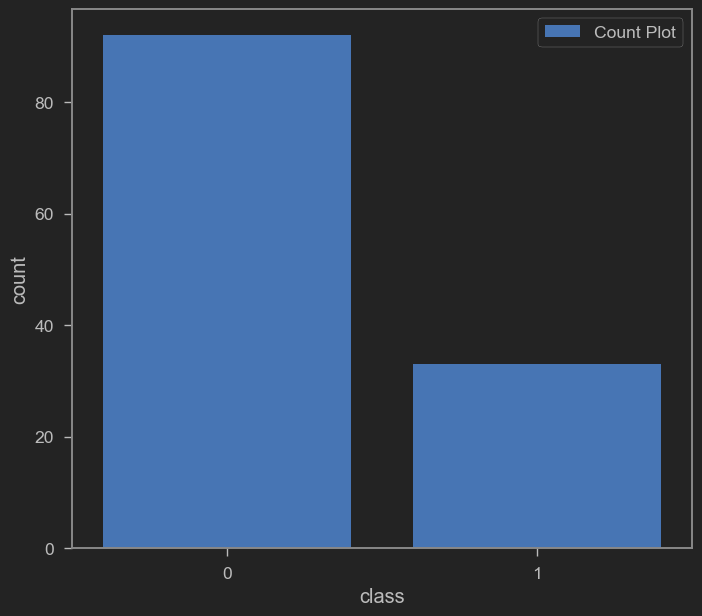

In [54]:
# Plot the counts of flagged vs not flagged
sns.countplot(data = resume_df, x = resume_df['class'], label = 'Count Plot')

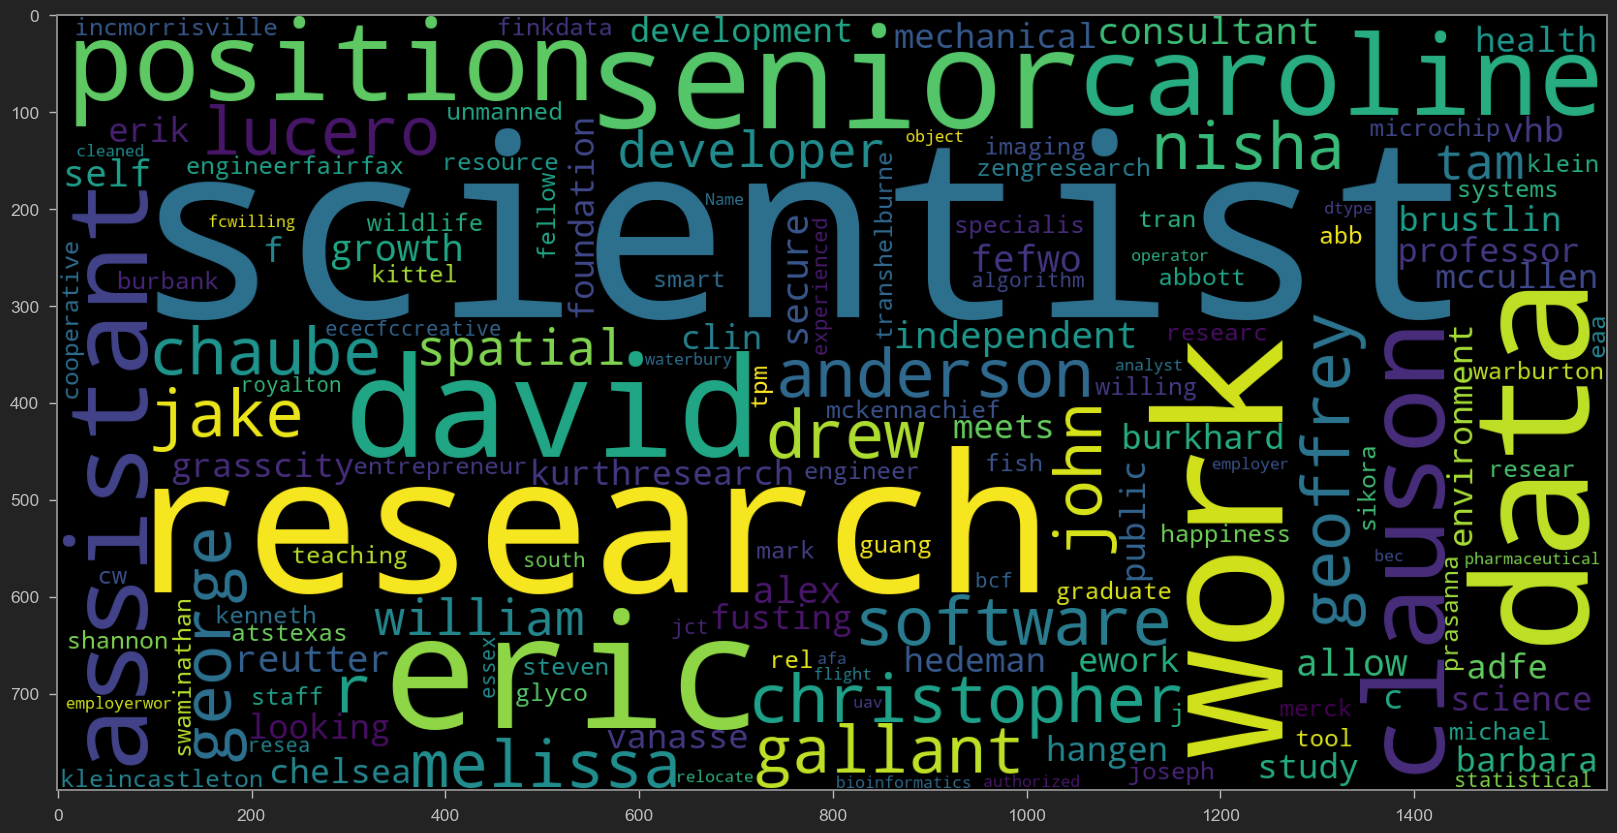

In [56]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==1]['cleaned']))
plt.imshow(wc)

- Plot the wordcloud for class #0

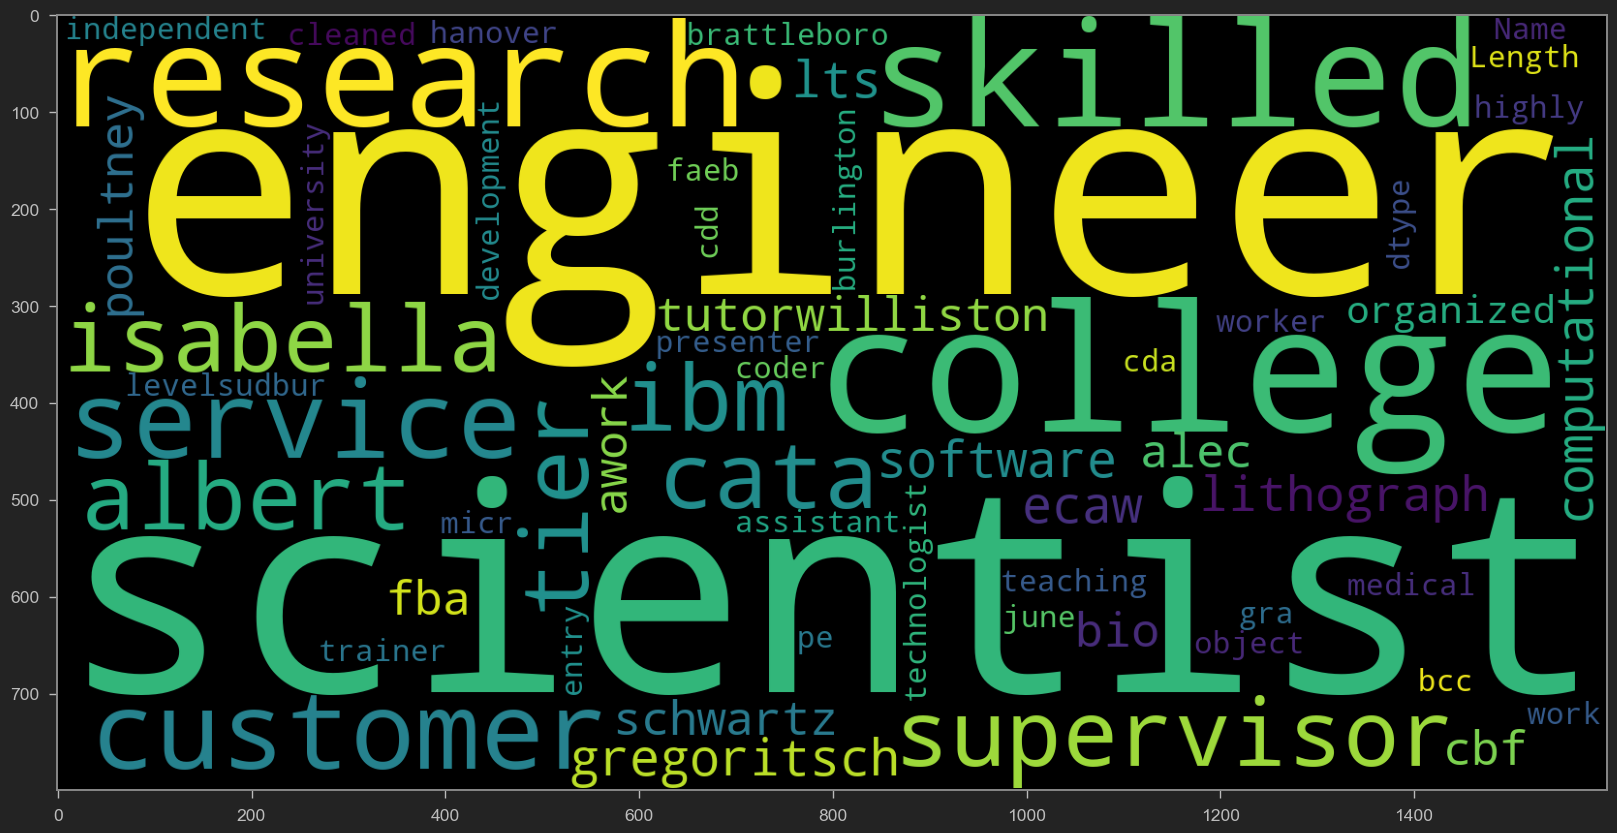

In [58]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==0]['cleaned']))
plt.imshow(wc)

# TASK #6: PREPARE THE DATA BY APPLYING COUNT VECTORIZER

In [60]:
# A Count tokenizer usually called Count Vectorizer in sklearn is a text processing tool that converts text document
# into numerical vectors by counting word occurences. It's one of the simplest but most powerful NLP techniques. It
# is essentially a 'word counter' that converts text into numbers that machine learning algorithms can understand.

In [62]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [63]:
# get feature names
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [64]:
# take a look at the actual encoded data
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [70]:
# Applying CountVectorier to the cleaned text
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])

In [72]:
# get feature names
print(vectorizer.get_feature_names_out().tolist())

['aaalac', 'aabb', 'aac', 'aacn', 'aacr', 'aacrjournals', 'aakeroõ_y', 'aanpcp', 'aaron', 'abbott', 'abdomen', 'abdominal', 'abdul', 'aberdeen', 'abi', 'abilities', 'ability', 'abiotic', 'able', 'abnormal', 'aboard', 'abosalem', 'abraham', 'abreast', 'abs', 'absence', 'absorbance', 'abstract', 'abstracta', 'abstractdisease', 'abstracted', 'abstractin', 'abstracts', 'abualrub', 'abundance', 'abureehan', 'abuse', 'abusiness', 'academia', 'academic', 'academics', 'academy', 'acaeefbc', 'accelerated', 'accept', 'acceptability', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accession', 'accident', 'accidents', 'accolateî', 'accommodations', 'accomplished', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountable', 'accounted', 'accounting', 'accounts', 'accreditation', 'accredited', 'accrual', 'accumulation', 'accuracy', 'accurate', 'accurately', 'accustomed'

In [74]:
# take a look at the actual encoded data
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS - PART #1

In [77]:
# Naive Bayes is a classification technique based on Bayes' Theorem. To explain it clearly, let's have an example, assuming that you are a data
# scientist working in a major bank and you want to classify a new client as eligible to retire or not. The customer features are his/her age and
# salary. When we plot that in a scatterplot, AGE in X axis and Salary on Y, points can be classified as RED or BLUE, NOT ELIGIBLE to retire or ELIGIBLE, respectively. Our data has 60
# data points having 40 - BLUE and 20 - RED. Out task is to classify a new point to RED or BLUE. Now lets define some terms related to Naive Bayes.

# Prior Probability: Since we have more BLUE compared to RED, we can assume that our new point is twice as likely to be BLUE than RED. To compute for
# the Prior Probability of RED,

# Prior Probability of RED = (no. of red points)/(Total no. of points) = 20/60 = 1/3
# Prior Probability of BLUE = (no. of blue points)/(Total no. of points) = 40/60 = 2/3

# Likelihood: For the new point, if there are more BLUE points in its vicinity, it is more likely that the new point will be classdified as BLUE. So we
# draw a circle around the point, then we calculate the number of points in the circle belonging to each class label.

# Example the new data X has 3 red and 1 blue in its vicinity.

# Likelihood of X being RED = (no. of RED points in vicinity)/(total no. of red points) = 3/20
# Likelihood of X being BLUE = (no. of BLUE points in vicinity)/(total no. of BLUE points) = 1/40

# Posterior Probability: Combining the prior probability and likelihood will create a posterior probability. Prior Probabilities suggests that X may be
# classified as BLUE because there are twice as much blue points, while Likelihood suggests that X is RED because there are more RED points in the
# vicinity of X. Bayes' Rule combines both to form a posterior probability.

# Posterior Probability of X being RED = Prior Probability of RED * Likelihood of X being RED = 1/3 * 3/20 = 1/20
# Posterior Probability of X being BLUE = Prior Probability of BLUE * Likelihood of X being BLUE = 2/3 * 1/40 = 1/60

# Therefore, X is classified as RED(NOT Eligible or NON RETIRING), since it has a larger Posterior Probability.


# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS - PART #2

In [80]:
# Why is it called Naive? It is because it assumes that the presence of a certain feature in a class is independent of the presence of other features.
# Example: Age/Savings, the assumption is not necessarily true since age and savings might be dependent on each other. Another Example: Fruit can be
# classified as watermelon if its color is green, tastes sweet and round. These features might be dependent on each other, however, we assume they are
# all independent and that's why its 'Naive'!

# Naive Bayes is a classification technique based on Bayes' Theorem.
# P(Retire|X) = (Likelihood * Prior Probability of Retiring)/Marginal Likelihood
# P(Retire|X) = (P(X|Retire) * P(Retire))/P(X)

# Where:
# X: is the new customer's features; age and savings
# P(Retire|X): probability of customer retiring given his/her features, such as age and savings
# P(Retire): Prior probability of retiring, without any prior knowledge
# P(X|Retire): likelihood
# P(X): Marginal likelihood, the probability of any point added lies into the circle

In [82]:
# P(Retire|X) = (P(X|Retire) * P(Retire))/P(X)

# Given:
# P(Retire) = 40/60 or 2/3
# P(X|Retire) = 1/40
# P(X) = 4/60

# P(Retire|X) = (P(X|Retire) * P(Retire))/P(X)
# P(Retire|X) = (1/40 * 2/3)/4/60 = 1/60 * 60/4 = 1/4 = 0.25

- Calculate the probability of the red class (non-retiring).

In [85]:
# P(Non Retire|X) = (P(X|Non Retire) * P(Non Retire))/P(X)

# Given:
# P(Non Retire) = 20/60 or 1/3
# P(X|Non Retire) = 3/20
# P(X) = 4/60

# P(Non Retire|X) = (P(X|Non Retire) * P(Non Retire))/P(X)
# P(Non Retire|X) = (3/20 * 1/3)/4/60 = 1/20 * 60/4 = 3/4 = 0.75

# or just 1 - P(X|Retire) = 1 - 0.25 = 0.75

# TASK#9: TRAIN NAIVE BAYES CLASSIFIER MODEL

In [88]:
X = countvectorizer

In [90]:
y = resume_df['class']

In [92]:
X.shape

(125, 11314)

In [94]:
y.shape

(125,)

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [100]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

- Split the data into 25% testing and 75% training and perform a sanity check



In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
# X_train.shape

In [ ]:
# X_test.shape

# TASK #10: ASSESS TRAINED MODEL PERFORMANCE


In [ ]:
# Now let's assess the performance of our trained model, when we do classification task, what we want to do is to visualliy assess the performance of
# the model. Basically, we do this by plotting the confusion matrix. The X axis or the column is the True class, while the rows or the Y axis is the
# predicted class.

# If the model predictions mathc whats actually happening in real life, then that's a good thing. If the model predicted positive and the true class is
# positive then we call that true positive. If the model predictions was negative but the true class is negative, well, that's a good thing too. That
# means the model was actually pretty accurate. We call that true negative. But there the this troublemakers, one of the model predicted positive but
# the true class is negative, we call this false positives or type 1 error and if the model predicted negative when they are positive, we call this 
# false negatives or type 2 error

In [ ]:
# JUST FOR COMPARISON!!!
# Predicting the performance on train data
# y_predict_train = NB_classifier.predict(X_train)
# y_predict_train
# cm = confusion_matrix(y_train, y_predict_train)
# sns.heatmap(cm, annot = True)

<Axes: >

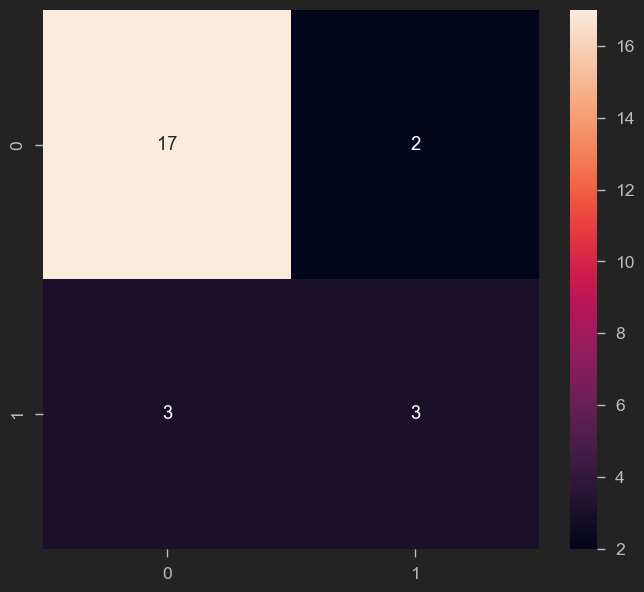

In [103]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [105]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.60      0.50      0.55         6

    accuracy                           0.80        25
   macro avg       0.72      0.70      0.71        25
weighted avg       0.79      0.80      0.79        25



- Retrain the model after spliting the data into 30% testing and 70% training and assess model performance


<Axes: >

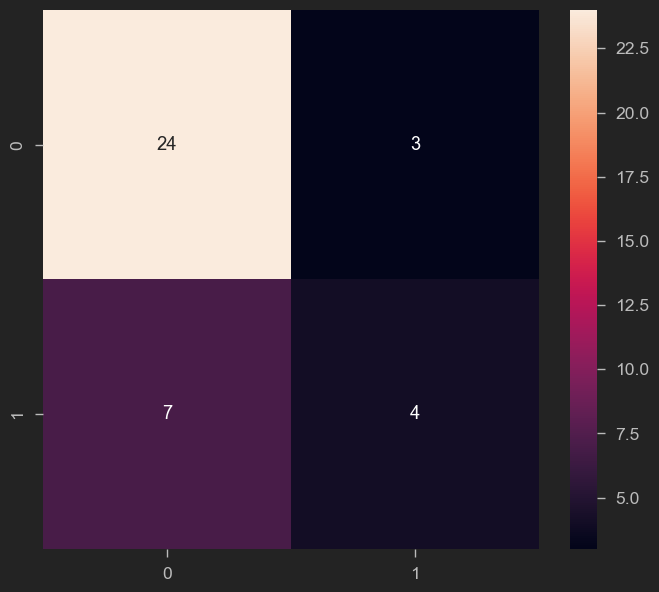

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [110]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.57      0.36      0.44        11

    accuracy                           0.74        38
   macro avg       0.67      0.63      0.64        38
weighted avg       0.72      0.74      0.72        38



# GREAT JOB!